In [289]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState


image_shape = (64, 64)
rng = RandomState(0)
faces, label = fetch_olivetti_faces(return_X_y=True, shuffle=True,
                                random_state=rng)


# Use 240 = 400 * 0.6 as train
train_face = faces[0:int(len(faces)*0.6)]
train_label = label[0:int(len(label)*0.6)]


# Use 160 = 400 * 0.4 as train
test_face = faces[int(len(faces)*0.6):]
test_label= label[int(len(label)*0.6):]


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(n_col,n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest')

        plt.xticks(())
        plt.yticks(())

      

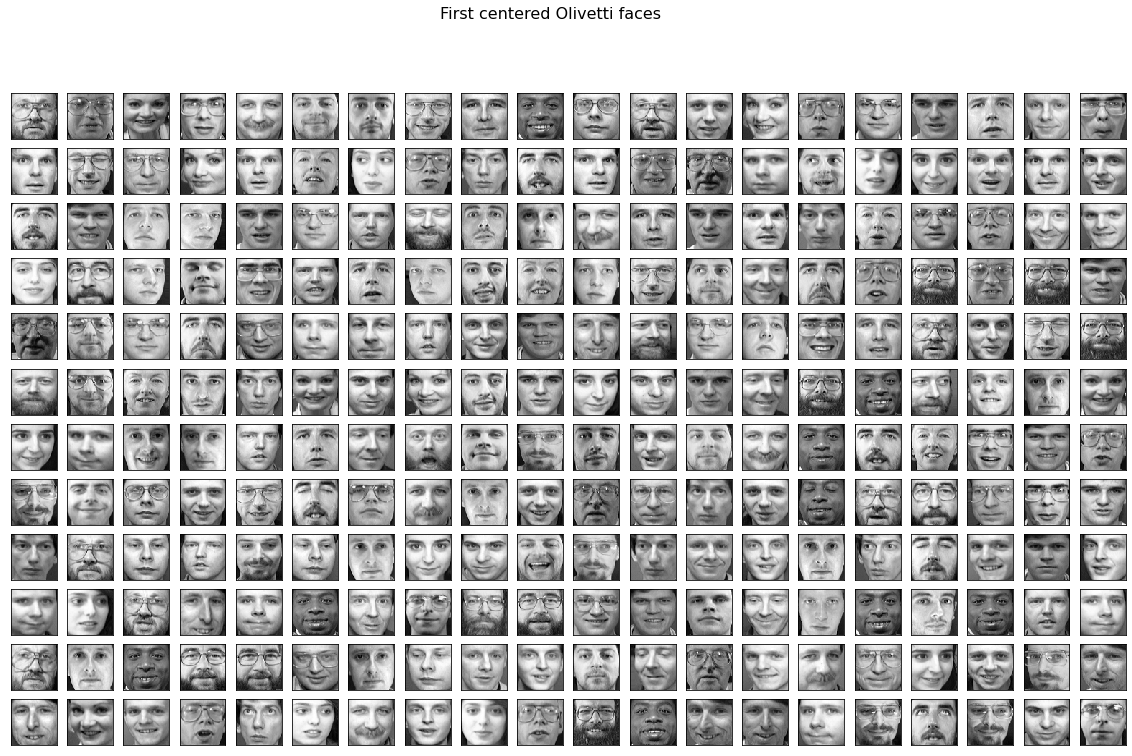

In [291]:
plot_gallery("Train set of Olivetti faces", train_face)

In [358]:
# plot_gallery("Test set of Olivetti faces", test_face)

In [269]:
from sklearn.decomposition import NMF
import numpy as np

model = NMF(n_components=22, init='random', max_iter=5000, tol=0.001, alpha=0.02)
W = model.fit_transform(train_face.T)
H = model.components_

In [296]:
# image index form testset
image_index = 22
print("index of test image set: ",image_index)

index = np.where(train_label == test_label[image_index])[0]
print("indexs of train image set which equal to index of test image set: ",index)

# H hat
H_hat = np.dot(np.dot(np.linalg.inv(np.dot(W.T,W)),W.T),test_face.T[:,image_index])

index of test image set:  22
indexs of train image set which equal to index of test image set:  [ 14  27  57  75 139 223 229]


We will use the below image for testing


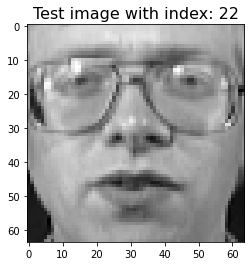

In [357]:
print("We will use the below image for testing")
title = "Test image with index: "+str(image_index)
plt.title(title, size=16)
plt.imshow(img.reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

Images from train set which has same label to test set 
Remember in real case we won't have any labels


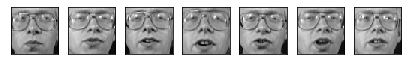

In [362]:
# plot train images
print("Images from train set which has same label to test set \nRemember in real case we won't have any labels")# with index: ",image_index)
plot_gallery("", train_face[[14,27,57,75,139,223,229]], n_col=len(index), n_row=1)

Images reconstruction from train set(from above) with indexs:  [ 14  27  57  75 139 223 229]


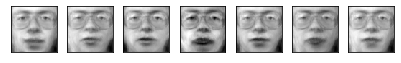

In [324]:
# Face reconstruction from above
print("Images reconstruction from train set(from above) with indexs: ",index)
ReFace = np.dot(W,H[:,index])
plot_gallery("", ReFace.T)

In [353]:
from scipy.spatial import distance

thershold = 0.1
print("Compute cosine similiarity with thershold:",thershold," between images of train sets and a image of test set")
print("(Remember A test set image index is :",image_index,")")
print(" ")

for i in range(H.shape[1]):
    
    res = distance.cosine(H_hat, H[:,i])
    
    if res < thershold:        
        print("index: ",i," with similiarity ",res)
        
print(" ")
print("Index come form train set which labels same as test set",index)
print("As u see that some of the index is missing from above")
print(" ")
print("Use all indexs to compute similiarity:")

for ele in enumerate(index):

    res = distance.cosine(H_hat, H[:,ele[1]])    
    print("index: ",ele[1]," with similiarity ",res)


Compute cosine similiarity with thershold: 0.1  between images of train sets and a image of test set
(Remember A test set image index is : 22 )
 
index:  27  with similiarity  0.09702789783477783
index:  57  with similiarity  0.026642918586730957
index:  139  with similiarity  0.014845073223114014
index:  229  with similiarity  0.08105087280273438
 
Index come form train set which labels same as test set [ 14  27  57  75 139 223 229]
As u see that some of the index is missing from above
 
Use all indexs to compute similiarity:
index:  14  with similiarity  0.1685020923614502
index:  27  with similiarity  0.09702789783477783
index:  57  with similiarity  0.026642918586730957
index:  75  with similiarity  0.25289297103881836
index:  139  with similiarity  0.014845073223114014
index:  223  with similiarity  0.14532077312469482
index:  229  with similiarity  0.08105087280273438
